In [1]:
from pathlib import Path

data_path = Path("")
image_path = data_path / "mask"
image_path

WindowsPath('mask')

# Data Preparation

In [2]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filename in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filename)} images in `{dirpath}`")
    
walk_through_dir(image_path)

There are 2 directories and 0 images in `mask`
There are 3 directories and 0 images in `mask\test`
There are 0 directories and 140 images in `mask\test\incorrect_mask`
There are 0 directories and 138 images in `mask\test\without_mask`
There are 0 directories and 138 images in `mask\test\with_mask`
There are 3 directories and 0 images in `mask\train`
There are 0 directories and 563 images in `mask\train\incorrect_mask`
There are 0 directories and 548 images in `mask\train\without_mask`
There are 0 directories and 552 images in `mask\train\with_mask`


In [3]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('mask/train'), WindowsPath('mask/test'))

# Visualize image

Random Image Path: mask\train\with_mask\augmented_image_234.jpg
Image Class: with_mask
Image Height: 275
Image Width: 183


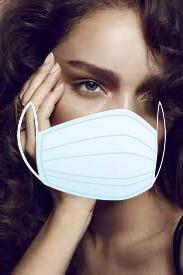

In [4]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")

img

All images have different sizes will need resizing.

# Transforming Data

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Converting image to 64x64, might be too small we'll see

In [6]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

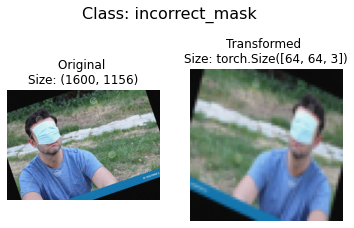

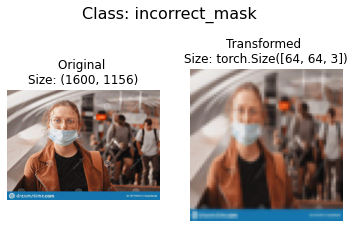

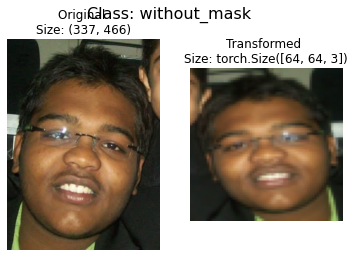

In [7]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_path = random.sample(image_paths, k=n)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
            
plot_transformed_images(image_path_list,
                       transform=data_transform,
                       n=3)

In [8]:
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

print(f"Train data\n{train_data}\nTest data:\n{test_data}")

Train data
Dataset ImageFolder
    Number of datapoints: 1663
    Root location: mask\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 416
    Root location: mask\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [9]:
class_names = train_data.classes
class_names

['incorrect_mask', 'with_mask', 'without_mask']

In [10]:
class_dict = train_data.class_to_idx
class_dict

{'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2}

In [11]:
len(train_data), len(test_data)

(1663, 416)

In [12]:
img, label = train_data[0][0], train_data[0][1]

print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label:{label}")
print(f"Label Datatype:\n{type(label)}")

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 64, 64])
Image datatype: torch.float32
Image label:0
Label Datatype:
<class 'int'>


### Turn loaded images into `DataLoader`

In [13]:
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=1,
                            num_workers=1,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x266d51f1640>,
 <torch.utils.data.dataloader.DataLoader at 0x266d51f1610>)

In [14]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# Model 0: TinyVGG with HorizontalFlip

In [15]:
from torch import nn

class TinyVGG(nn.Module):
    
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride= 1,
                     padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride= 1,
                     padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                     out_features=output_shape)
        )
        
    def forward(self, x: torch.Tensor):
        x = self.conv_layer1(x)
        #print(x.shape)
        x = self.conv_layer2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
    
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes))

model_0

TinyVGG(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [16]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single Image Shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single)
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual Label:\n{label_single}")

Single Image Shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0682, 0.0643, 0.0402]])

Output prediction probabilities:
tensor([[0.3369, 0.3355, 0.3276]])

Output prediction label:
tensor([0])

Actual Label:
1


In [17]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

# Model Train and Testing

In [18]:
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer):
    
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        
        # Forward pass
        y_pred = model(X)
        
        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
        
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [19]:
def test_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module):
    
    model.eval()
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            
            # Forward pass
            test_pred_logits = model(X)
            
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            test_pred_labels = torch.argmax(test_pred_logits, dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)
            
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [20]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
         epochs: int = 5):
    
    results = {"train_loss": [],
              "train_acc": [],
              "test_loss": [],
              "test_acc": []
              }
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer)
        
        test_loss, test_acc = test_step(model=model,
                                       dataloader=test_dataloader,
                                       loss_fn=loss_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} |"
            f"train_acc: {train_acc:.4f} |"
            f"test_loss: {test_loss:.4f} |"
            f"test_acc: {test_acc:.4f}"
        )
        
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
        
    return results

In [21]:
torch.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total Training Time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8212 |train_acc: 0.6061 |test_loss: 0.4245 |test_acc: 0.8534
Epoch: 2 | train_loss: 0.4114 |train_acc: 0.8461 |test_loss: 0.3256 |test_acc: 0.8774
Epoch: 3 | train_loss: 0.2725 |train_acc: 0.9086 |test_loss: 0.2728 |test_acc: 0.9135
Epoch: 4 | train_loss: 0.1961 |train_acc: 0.9314 |test_loss: 0.2358 |test_acc: 0.9038
Epoch: 5 | train_loss: 0.1668 |train_acc: 0.9453 |test_loss: 0.2091 |test_acc: 0.9351
Total Training Time: 116.805 seconds


# Model Loss Curve

In [22]:
from typing import Tuple, Dict, List
def plot_loss_curve(results: Dict[str, List[float]]):
    
    loss = results['train_loss']
    test_loss = results['test_loss']
    
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    
    epochs = range(len(results['train_loss']))
    
    plt.figure(figsize=(15, 7))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

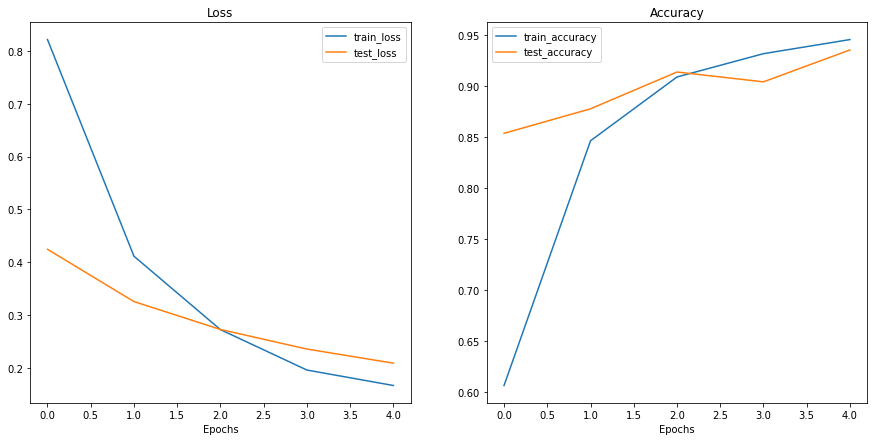

In [23]:
plot_loss_curve(model_0_results)

### Model 0 is currently overfitting

# Model 1: TinyVGG with no augmentation

In [24]:
train_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [25]:
train_data_simple = datasets.ImageFolder(train_dir, transform=train_transform_simple)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform_simple)

train_data_simple, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 1663
     Root location: mask\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 416
     Root location: mask\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [26]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(train_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True,
                                    num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,
                                   num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x266d61fab50>,
 <torch.utils.data.dataloader.DataLoader at 0x266d61faa90>)

In [28]:
torch.manual_seed(42)

model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_simple.classes)
)

model_1

TinyVGG(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [30]:
torch.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                       train_dataloader=train_dataloader_simple,
                       test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total Training Time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0863 |train_acc: 0.3999 |test_loss: 1.0333 |test_acc: 0.4471
Epoch: 2 | train_loss: 0.8084 |train_acc: 0.6346 |test_loss: 0.5924 |test_acc: 0.7716
Epoch: 3 | train_loss: 0.4589 |train_acc: 0.8257 |test_loss: 0.4185 |test_acc: 0.8438
Epoch: 4 | train_loss: 0.3669 |train_acc: 0.8587 |test_loss: 0.3525 |test_acc: 0.8726
Epoch: 5 | train_loss: 0.2948 |train_acc: 0.8912 |test_loss: 0.3025 |test_acc: 0.9038
Total Training Time: 182.127 seconds


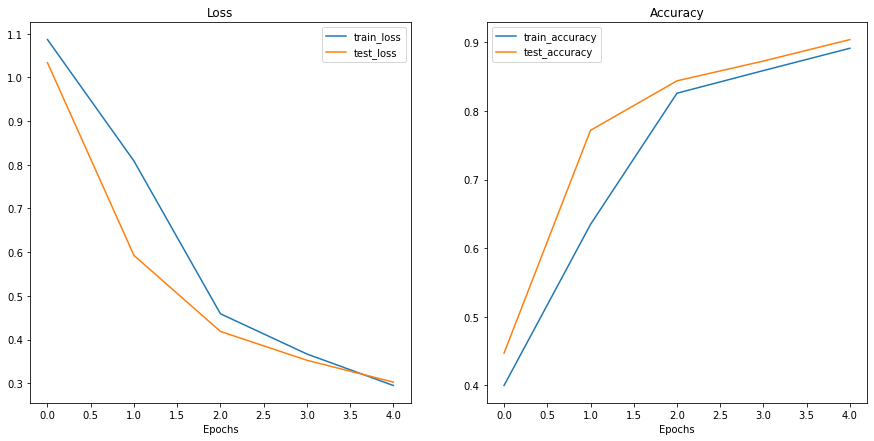

In [31]:
plot_loss_curve(model_1_results)

# Compare model results

In [32]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,0.821207,0.606133,0.424483,0.853365
1,0.411404,0.846061,0.325602,0.877404
2,0.272517,0.908599,0.272829,0.913462
3,0.196075,0.931449,0.235769,0.903846
4,0.166813,0.945280,0.209114,0.935096


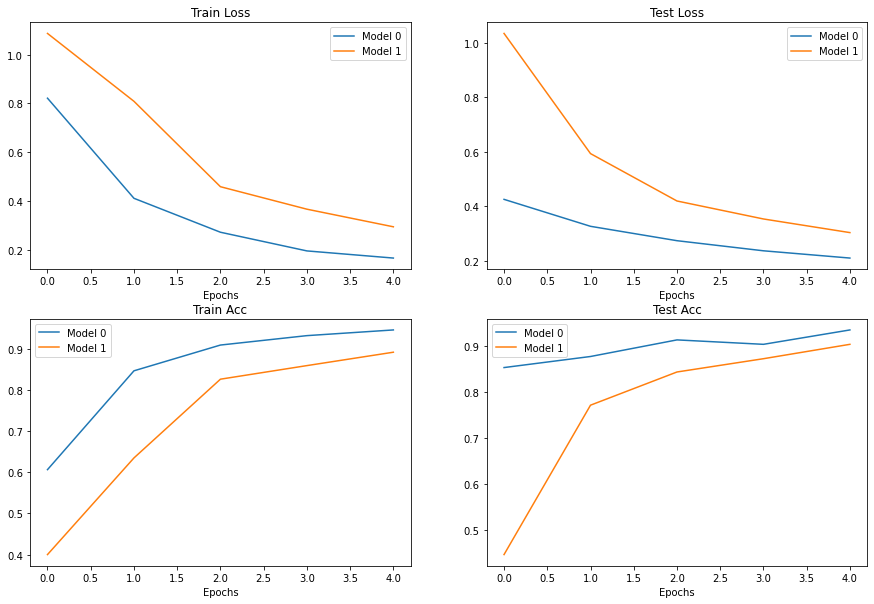

In [34]:
plt.figure(figsize=(15, 10))

epochs = range(len(model_0_df))

plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend();

 Looking at this comparision Model 0 has better performance as seen in the loss and acc graphs however, if we were to look at the individual model's loss curve Model 0 is currently overfitting

In [36]:
import requests

custom_image_path = data_path / "man-wearing-face-mask-in-public-transportation-6FBGQJZ.jpg"

if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        request = requests.get("https://www.acslaw.org/wp-content/uploads/2020/06/man-wearing-face-mask-in-public-transportation-6FBGQJZ.jpg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download")
        

In [38]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[ 26,  27,  27,  ..., 111, 140, 166],
         [ 26,  26,  26,  ..., 148, 188, 203],
         [ 25,  26,  26,  ..., 196, 218, 211],
         ...,
         [ 12,  12,  12,  ...,  91,  94,  95],
         [ 12,  12,  12,  ...,  91,  92,  96],
         [ 12,  12,  11,  ...,  93,  93,  93]],

        [[ 34,  35,  35,  ..., 129, 157, 183],
         [ 34,  34,  34,  ..., 165, 205, 220],
         [ 33,  34,  32,  ..., 212, 234, 227],
         ...,
         [ 20,  20,  20,  ...,  29,  32,  33],
         [ 20,  20,  20,  ...,  29,  30,  34],
         [ 20,  20,  21,  ...,  31,  31,  33]],

        [[ 45,  46,  46,  ..., 149, 175, 201],
         [ 45,  45,  45,  ..., 183, 221, 236],
         [ 44,  45,  44,  ..., 227, 247, 240],
         ...,
         [ 33,  33,  33,  ...,  42,  45,  46],
         [ 33,  33,  33,  ...,  40,  43,  47],
         [ 33,  33,  33,  ...,  44,  42,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 667, 1000])

Custom image dtyp

In [39]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image = custom_image / 255

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.1020, 0.1059, 0.1059,  ..., 0.4353, 0.5490, 0.6510],
         [0.1020, 0.1020, 0.1020,  ..., 0.5804, 0.7373, 0.7961],
         [0.0980, 0.1020, 0.1020,  ..., 0.7686, 0.8549, 0.8275],
         ...,
         [0.0471, 0.0471, 0.0471,  ..., 0.3569, 0.3686, 0.3725],
         [0.0471, 0.0471, 0.0471,  ..., 0.3569, 0.3608, 0.3765],
         [0.0471, 0.0471, 0.0431,  ..., 0.3647, 0.3647, 0.3647]],

        [[0.1333, 0.1373, 0.1373,  ..., 0.5059, 0.6157, 0.7176],
         [0.1333, 0.1333, 0.1333,  ..., 0.6471, 0.8039, 0.8627],
         [0.1294, 0.1333, 0.1255,  ..., 0.8314, 0.9176, 0.8902],
         ...,
         [0.0784, 0.0784, 0.0784,  ..., 0.1137, 0.1255, 0.1294],
         [0.0784, 0.0784, 0.0784,  ..., 0.1137, 0.1176, 0.1333],
         [0.0784, 0.0784, 0.0824,  ..., 0.1216, 0.1216, 0.1294]],

        [[0.1765, 0.1804, 0.1804,  ..., 0.5843, 0.6863, 0.7882],
         [0.1765, 0.1765, 0.1765,  ..., 0.7176, 0.8667, 0.9255],
         [0.1725, 0.1765, 0.1725,  ..

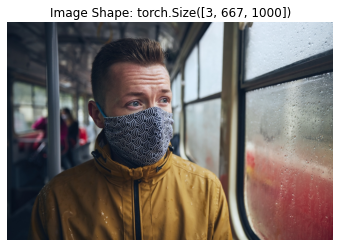

In [40]:
plt.imshow(custom_image.permute(1, 2, 0))

plt.title(f"Image Shape: {custom_image.shape}")
plt.axis(False);

In [42]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64))
])

custom_image_transformed = custom_image_transform(custom_image)

print(f"Original Shape: {custom_image.shape}")
print(f"New Shape: {custom_image_transformed.shape}")


Original Shape: torch.Size([3, 667, 1000])
New Shape: torch.Size([3, 64, 64])


In [56]:
model_1.eval()
with torch.inference_mode():
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [57]:
custom_image_pred

tensor([[-2.1141, -0.9798,  2.1686]])

In [58]:
print("Prediction logits: {custom_image_pred}")

custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction Probabilities: {custom_image_pred_probs}")

custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: {custom_image_pred}
Prediction Probabilities: tensor([[0.0131, 0.0406, 0.9463]])
Prediction label: tensor([2])


In [59]:
custom_image_pred_class = class_names[custom_image_pred_label]
custom_image_pred_class

'without_mask'

Model 1 was unable to predict the correct class while Model 0 was.